In [1]:
# Predicting Bee Colonies Survival 

In [2]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sqlite3
from sqlalchemy import create_engine
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier



In [3]:
## updated 
database_path = Path("./save_the_bees.db")

engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()
sql_query = "SELECT * FROM bee_colonies"

df = pd.read_sql(sql_query, conn)



In [4]:
df = df[['state', 'num_colonies', 'max_colonies', 'lost_colonies',
       'percent_lost', 'added_colonies', 'renovated_colonies',
       'percent_renovated', 'quarter', 'year', 'varroa_mites',
       'other_pests_and_parasites', 'diseases', 'pesticides', 'other',
       'unknown']]
df

,state,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,7000,7000,1800,26,2800,250,4,1,2015,10.0,5.4,0.0,2.2,9.1,9.4
1,Arizona,35000,35000,4600,13,3400,2100,6,1,2015,26.9,20.5,0.1,0.0,1.8,3.1
2,Arkansas,13000,14000,1500,11,1200,90,1,1,2015,17.6,11.4,1.5,3.4,1.0,1.0
3,California,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,3500,12500,1500,12,200,140,1,1,2015,14.6,0.9,1.8,0.6,2.6,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,West Virginia,7500,8000,1100,14,0,220,3,4,2022,33.4,3.8,0.8,0.0,6.4,0.5
1449,Wisconsin,26000,47000,3500,7,140,380,1,4,2022,23.2,21.4,19.4,17.5,9.9,11.7
1450,Wyoming,19500,21000,3200,15,640,0,0,4,2022,22.9,5.9,4.2,0.0,0.0,7.4
1451,Other,30030,30030,480,2,1190,130,0,4,2022,22.4,18.5,0.0,0.0,0.0,0.7


In [5]:
df.describe()

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
count,1.453000e+03,1.453000e+03,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1.238883e+05,1.558856e+05,16694.542326,11.219546,15819.036476,13601.734343,7.158981,2.505850,2018.474191,30.186098,10.937509,3.406676,6.185272,6.083345,3.994907
std,4.384485e+05,5.535112e+05,60673.470186,7.375083,63545.779316,57225.881599,9.038191,1.132782,2.322824,18.861293,13.035092,6.472063,8.959392,6.488208,4.939563
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,9.500000e+03,950.000000,6.000000,380.000000,150.000000,1.000000,1.000000,2016.000000,15.600000,1.900000,0.100000,0.400000,1.800000,0.800000
50%,1.850000e+04,2.300000e+04,2200.000000,10.000000,1600.000000,800.000000,4.000000,3.000000,2018.000000,27.200000,7.000000,1.100000,2.600000,4.100000,2.400000
75%,5.800000e+04,7.900000e+04,7000.000000,14.000000,6000.000000,3700.000000,10.000000,4.000000,2021.000000,42.200000,15.100000,4.200000,8.500000,8.200000,5.400000
max,3.181180e+06,5.153870e+06,502350.000000,65.000000,736920.000000,762550.000000,77.000000,4.000000,2022.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000


In [6]:
df = pd.get_dummies(df, columns=['state'], dtype=int)
df

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,...,state_Tennessee,state_Texas,state_United States,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,7000,7000,1800,26,2800,250,4,1,2015,10.0,...,0,0,0,0,0,0,0,0,0,0
1,35000,35000,4600,13,3400,2100,6,1,2015,26.9,...,0,0,0,0,0,0,0,0,0,0
2,13000,14000,1500,11,1200,90,1,1,2015,17.6,...,0,0,0,0,0,0,0,0,0,0
3,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,...,0,0,0,0,0,0,0,0,0,0
4,3500,12500,1500,12,200,140,1,1,2015,14.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,7500,8000,1100,14,0,220,3,4,2022,33.4,...,0,0,0,0,0,0,0,1,0,0
1449,26000,47000,3500,7,140,380,1,4,2022,23.2,...,0,0,0,0,0,0,0,0,1,0
1450,19500,21000,3200,15,640,0,0,4,2022,22.9,...,0,0,0,0,0,0,0,0,0,1
1451,30030,30030,480,2,1190,130,0,4,2022,22.4,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['num_colonies', 'max_colonies', 'lost_colonies', 'percent_lost',
       'added_colonies', 'renovated_colonies', 'percent_renovated', 'quarter',
       'year', 'varroa_mites', 'other_pests_and_parasites', 'diseases',
       'pesticides', 'other', 'unknown', 'state_Alabama', 'state_Arizona',
       'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Florida', 'state_Georgia', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_North Dakota', 'state_Ohio', 'state_Oklahoma', 'state_Oregon',
       'state_Other', 'state_Pennsylvania', 'state_South Carolina',
       '

In [8]:
# Remove Unnecessary Columns
df = df[['num_colonies', 'max_colonies', 'lost_colonies', 'percent_lost',
       'added_colonies', 'renovated_colonies', 'percent_renovated', 'quarter',
       'year', 'varroa_mites', 'other_pests_and_parasites', 'diseases',
       'pesticides', 'other', 'unknown', 'state_Alabama', 'state_Arizona',
       'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Florida', 'state_Georgia', 'state_Hawaii',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Kansas', 'state_Kentucky', 'state_Louisiana', 'state_Maine',
       'state_Maryland', 'state_Massachusetts', 'state_Michigan',
       'state_Minnesota', 'state_Mississippi', 'state_Missouri',
       'state_Montana', 'state_Nebraska', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_North Dakota', 'state_Ohio', 'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania', 'state_South Carolina',
       'state_South Dakota', 'state_Tennessee', 'state_Texas', 'state_Utah', 'state_Vermont', 'state_Virginia',
       'state_Washington', 'state_West Virginia', 'state_Wisconsin',
       'state_Wyoming']]

In [9]:
# Model Iteration 1

In [10]:
y = df["percent_lost"]
X = df[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1 
                                                    )
X_train.shape

(1089, 7)

In [12]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [14]:
classifier.fit(X_train, y_train)

C:\Users\antho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.09825528007346189
Testing Data Score: 0.12087912087912088


In [16]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,8,3
1,12,12
2,8,8
3,14,14
4,8,10
5,7,23
6,12,10
7,8,13
8,8,3
9,8,3


In [17]:
accuracy_score(y_test, predictions)

0.12087912087912088

In [18]:
## Binning Percent_Lost

In [19]:
df["percent_lost"].describe()

count    1453.000000
mean       11.219546
std         7.375083
min         0.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        65.000000
Name: percent_lost, dtype: float64

In [20]:
# Creating Bins for Colonies Lost

In [21]:
bins = [-1, 15, 70]
group_labels = [0, 1]
df["target"] = pd.cut(df["percent_lost"], bins, labels=group_labels)
df.dropna() 
df

C:\Users\antho\AppData\Local\Temp\ipykernel_34072\3524227561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = pd.cut(df["percent_lost"], bins, labels=group_labels)


,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,target
0,7000,7000,1800,26,2800,250,4,1,2015,10.0,...,0,0,0,0,0,0,0,0,0,1
1,35000,35000,4600,13,3400,2100,6,1,2015,26.9,...,0,0,0,0,0,0,0,0,0,0
2,13000,14000,1500,11,1200,90,1,1,2015,17.6,...,0,0,0,0,0,0,0,0,0,0
3,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,...,0,0,0,0,0,0,0,0,0,0
4,3500,12500,1500,12,200,140,1,1,2015,14.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,7500,8000,1100,14,0,220,3,4,2022,33.4,...,0,0,0,0,0,0,1,0,0,0
1449,26000,47000,3500,7,140,380,1,4,2022,23.2,...,0,0,0,0,0,0,0,1,0,0
1450,19500,21000,3200,15,640,0,0,4,2022,22.9,...,0,0,0,0,0,0,0,0,1,0
1451,30030,30030,480,2,1190,130,0,4,2022,22.4,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df["target"].value_counts()

target
0    1159
1     294
Name: count, dtype: int64

In [23]:
# Model Iteration 2

In [24]:
y = df["target"]
X = df[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1 
                                                    )
X_train.shape

(1089, 7)

In [26]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [27]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [28]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [29]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.790633608815427
Testing Data Score: 0.8021978021978022


In [30]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [31]:
accuracy_score(y_test, predictions)

0.8021978021978022

In [32]:
# Model Iteration 3

In [33]:
# Remove outliers

In [34]:
Q1 = df["other_pests_and_parasites"].quantile(0.25)
Q3 = df["other_pests_and_parasites"].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Get the indices of outliers
outliers_indices = (df["other_pests_and_parasites"] < lower_bound) | (df["other_pests_and_parasites"] > upper_bound)
# Remove outliers from the DataFrame
df = df[~outliers_indices]

In [35]:
Q1 = df["diseases"].quantile(0.25)
Q3 = df["diseases"].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Get the indices of outliers
outliers_indices = (df["diseases"] < lower_bound) | (df["diseases"] > upper_bound)
# Remove outliers from the DataFrame
df = df[~outliers_indices]


In [36]:
y = df["target"]
X = df[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1 
                                                    )
X_train.shape

(956, 7)

In [38]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [39]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [40]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [41]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8075313807531381
Testing Data Score: 0.7962382445141066


In [42]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [43]:
accuracy_score(y_test, predictions)

0.7962382445141066

In [44]:
# Model Iteration 4

In [45]:
y = df["target"]
X = df[["varroa_mites", "pesticides", "diseases", "unknown", "quarter", "other_pests_and_parasites", "year"]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1 
                                                    )
X_train.shape

(956, 7)

In [47]:
scaler = StandardScaler()

In [48]:
X_scaler = scaler.fit(X_train)

In [49]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [51]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [52]:
predictions = rf_model.predict(X_test_scaled)

In [53]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8338557993730408

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

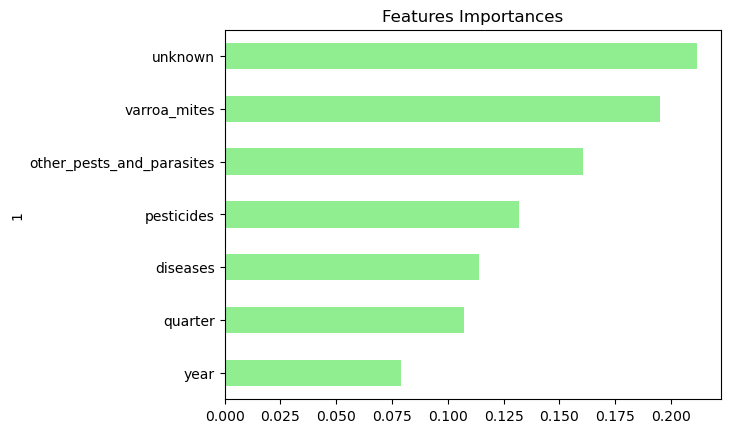

In [54]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)